# EDA on Previous Application, POS CASH balance, Instalments and Credit Card Balance
The goal in this step is to:
- Load the datasets:
  - previous_application.csv
  - POS_CASH_balance.csv
  - installments_payments.csv
  - credit_card_balance.csv
  - Perform feature engineering and;
- Export the aggregated datasets as a behavioural dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from functools import reduce

RAW_DIR = Path("../data/raw")
CLEAN_DIR = Path("../data/clean")

prev = pd.read_csv(RAW_DIR / "previous_application.csv")
pos_cash = pd.read_csv(RAW_DIR / "POS_CASH_balance.csv")
inst = pd.read_csv(RAW_DIR / "installments_payments.csv")
cc = pd.read_csv(RAW_DIR / "credit_card_balance.csv")

print("previous_application:", prev.shape)
print("POS_CASH_balance:", pos_cash.shape)
print("installments_payments:", inst.shape)
print("credit_card_balance:", cc.shape)


previous_application: (1670214, 37)
POS_CASH_balance: (10001358, 8)
installments_payments: (13605401, 8)
credit_card_balance: (3840312, 23)


### Explore missing values

In [2]:
def missing_summary(df, top_n=20):
    mis = df.isnull().mean().sort_values(ascending=False)
    out = mis.to_frame("missing_frac").assign(missing_pct=lambda x: x["missing_frac"]*100)
    return out.head(top_n)

print("prev missing:")
display(missing_summary(prev))
print("pos_cash missing:")
display(missing_summary(pos_cash))
print("inst missing:")
display(missing_summary(inst))
print("cc missing:")
display(missing_summary(cc))


prev missing:


,missing_frac,missing_pct
RATE_INTEREST_PRIVILEGED,9.964370e-01,99.643698
RATE_INTEREST_PRIMARY,9.964370e-01,99.643698
AMT_DOWN_PAYMENT,5.363648e-01,53.636480
RATE_DOWN_PAYMENT,5.363648e-01,53.636480
NAME_TYPE_SUITE,4.911975e-01,49.119754
NFLAG_INSURED_ON_APPROVAL,4.029813e-01,40.298129
DAYS_TERMINATION,4.029813e-01,40.298129
DAYS_LAST_DUE,4.029813e-01,40.298129
DAYS_LAST_DUE_1ST_VERSION,4.029813e-01,40.298129
DAYS_FIRST_DUE,4.029813e-01,40.298129


pos_cash missing:


,missing_frac,missing_pct
CNT_INSTALMENT_FUTURE,0.002608,0.260835
CNT_INSTALMENT,0.002607,0.260675
SK_ID_PREV,0.000000,0.000000
SK_ID_CURR,0.000000,0.000000
MONTHS_BALANCE,0.000000,0.000000
NAME_CONTRACT_STATUS,0.000000,0.000000
SK_DPD,0.000000,0.000000
SK_DPD_DEF,0.000000,0.000000


inst missing:


,missing_frac,missing_pct
DAYS_ENTRY_PAYMENT,0.000214,0.021352
AMT_PAYMENT,0.000214,0.021352
SK_ID_PREV,0.000000,0.000000
SK_ID_CURR,0.000000,0.000000
NUM_INSTALMENT_VERSION,0.000000,0.000000
NUM_INSTALMENT_NUMBER,0.000000,0.000000
DAYS_INSTALMENT,0.000000,0.000000
AMT_INSTALMENT,0.000000,0.000000


cc missing:


,missing_frac,missing_pct
AMT_PAYMENT_CURRENT,0.199981,19.998063
AMT_DRAWINGS_ATM_CURRENT,0.195249,19.524872
CNT_DRAWINGS_POS_CURRENT,0.195249,19.524872
AMT_DRAWINGS_OTHER_CURRENT,0.195249,19.524872
AMT_DRAWINGS_POS_CURRENT,0.195249,19.524872
CNT_DRAWINGS_OTHER_CURRENT,0.195249,19.524872
CNT_DRAWINGS_ATM_CURRENT,0.195249,19.524872
CNT_INSTALMENT_MATURE_CUM,0.079482,7.948208
AMT_INST_MIN_REGULARITY,0.079482,7.948208
SK_ID_PREV,0.000000,0.000000


### Explore previous_application

NAME_CONTRACT_STATUS
Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: count, dtype: int64


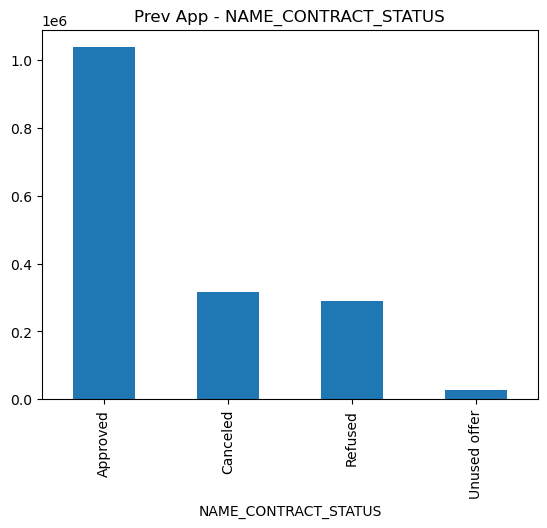

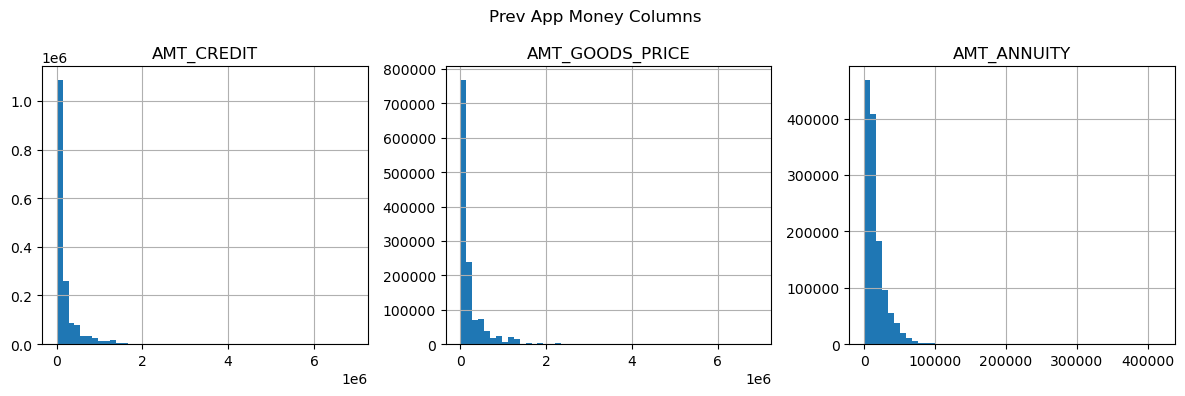

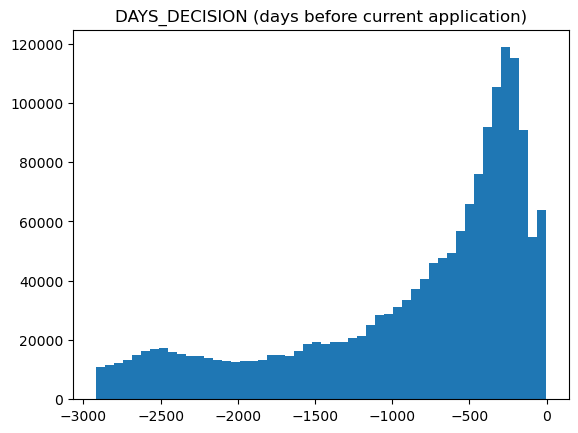

In [3]:
if "NAME_CONTRACT_STATUS" in prev.columns:
    status_counts = prev["NAME_CONTRACT_STATUS"].value_counts(dropna=False)
    print(status_counts)
    status_counts.plot(kind="bar")
    plt.title("Prev App - NAME_CONTRACT_STATUS")
    plt.show()

money_cols = ["AMT_CREDIT","AMT_GOODS_PRICE","AMT_ANNUITY"]
prev[money_cols].hist(bins=50, layout=(1,3), figsize=(12,4))
plt.suptitle("Prev App Money Columns")
plt.tight_layout()
plt.show()

if "DAYS_DECISION" in prev.columns:
    plt.hist(prev["DAYS_DECISION"], bins=50)
    plt.title("DAYS_DECISION (days before current application)")
    plt.show()


### POS_CASH_balance 

NAME_CONTRACT_STATUS
Active                   9151119
Completed                 744883
Signed                     87260
Demand                      7065
Returned to the store       5461
Approved                    4917
Amortized debt               636
Canceled                      15
XNA                            2
Name: count, dtype: int64


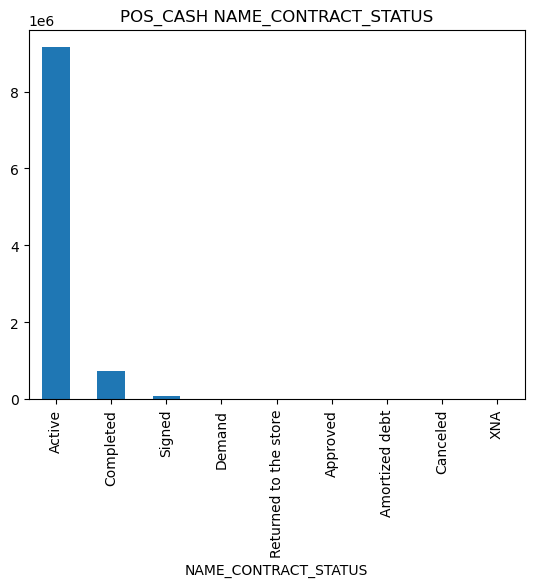

count    936325.000000
mean         10.681503
std           6.956280
min           1.000000
25%           7.000000
50%          10.000000
75%          13.000000
max          96.000000
dtype: float64


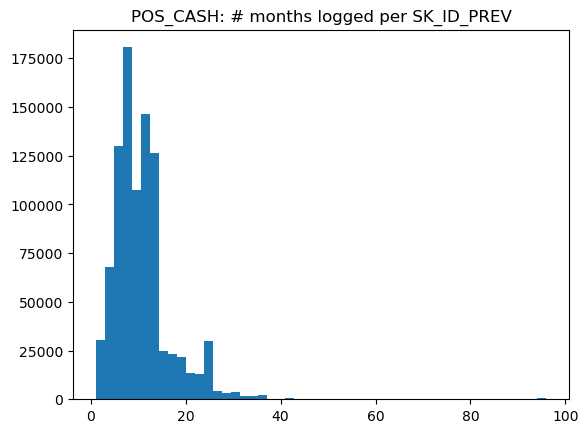

In [4]:
if "NAME_CONTRACT_STATUS" in pos_cash.columns:
    pos_status_counts = pos_cash["NAME_CONTRACT_STATUS"].value_counts(dropna=False)
    print(pos_status_counts)
    pos_status_counts.plot(kind="bar")
    plt.title("POS_CASH NAME_CONTRACT_STATUS")
    plt.show()

months_per_prev = pos_cash.groupby("SK_ID_PREV").size()
print(months_per_prev.describe())
plt.hist(months_per_prev, bins=50)
plt.title("POS_CASH: # months logged per SK_ID_PREV")
plt.show()


### installments_payments on-time vs late

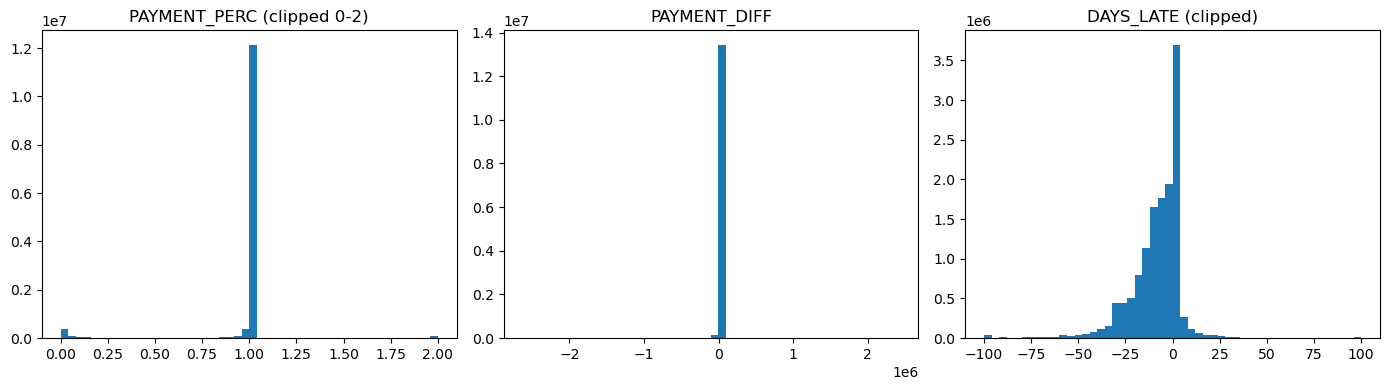

In [5]:
inst_fe = inst.copy()
inst_fe["PAYMENT_PERC"] = inst_fe["AMT_PAYMENT"] / inst_fe["AMT_INSTALMENT"]
inst_fe["PAYMENT_DIFF"] = inst_fe["AMT_INSTALMENT"] - inst_fe["AMT_PAYMENT"]
inst_fe["DAYS_LATE"] = inst_fe["DAYS_ENTRY_PAYMENT"] - inst_fe["DAYS_INSTALMENT"]

fig, axes = plt.subplots(1,3, figsize=(14,4))
axes[0].hist(inst_fe["PAYMENT_PERC"].clip(0,2), bins=50)
axes[0].set_title("PAYMENT_PERC (clipped 0-2)")
axes[1].hist(inst_fe["PAYMENT_DIFF"], bins=50)
axes[1].set_title("PAYMENT_DIFF")
axes[2].hist(inst_fe["DAYS_LATE"].clip(-100,100), bins=50)
axes[2].set_title("DAYS_LATE (clipped)")
plt.tight_layout()
plt.show()


### credit_card_balance utilization

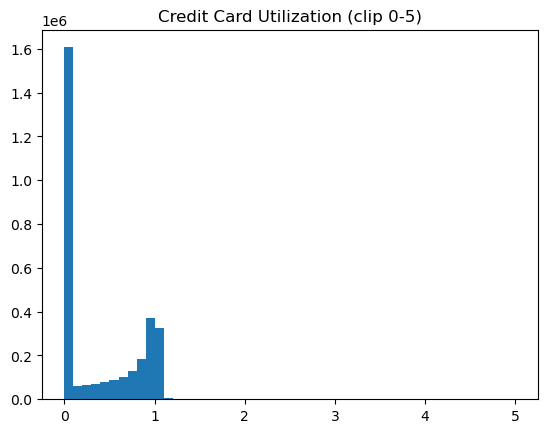

count    3.086489e+06
mean     3.746669e-01
std      4.307236e-01
min     -1.800000e+00
25%      0.000000e+00
50%      1.134400e-02
75%      8.691224e-01
max      1.177751e+01
Name: UTILIZATION, dtype: float64


In [6]:
if {"AMT_BALANCE","AMT_CREDIT_LIMIT_ACTUAL"}.issubset(cc.columns):
    cc["UTILIZATION"] = cc["AMT_BALANCE"] / cc["AMT_CREDIT_LIMIT_ACTUAL"].replace({0:np.nan})
    plt.hist(cc["UTILIZATION"].dropna().clip(0,5), bins=50)
    plt.title("Credit Card Utilization (clip 0-5)")
    plt.show()
    print(cc["UTILIZATION"].describe())


### Feature Engineering / Aggregations

We'll make:

1. previous_application → SK_ID_CURR
2. POS_CASH_balance → SK_ID_CURR
3. installments_payments → SK_ID_CURR
4. credit_card_balance → SK_ID_CURR

Then merge into `behavior_agg` (1 row per SK_ID_CURR).


In [7]:
def aggregate_previous_apps(df_prev: pd.DataFrame) -> pd.DataFrame:
    d = df_prev.copy()
    d["IS_APPROVED"] = (d["NAME_CONTRACT_STATUS"]=="Approved").astype(int)
    d["IS_REFUSED"] = (d["NAME_CONTRACT_STATUS"]=="Refused").astype(int)

    aggs = d.groupby("SK_ID_CURR").agg(
        NUM_PREV_APPS=("SK_ID_PREV","count"),
        NUM_APPROVED=("IS_APPROVED","sum"),
        NUM_REFUSED=("IS_REFUSED","sum"),
        MEAN_PREV_AMT_CREDIT=("AMT_CREDIT","mean"),
        MIN_DAYS_DECISION=("DAYS_DECISION","min"),
        MAX_DAYS_DECISION=("DAYS_DECISION","max")
    ).reset_index()

    aggs["APPROVAL_RATE"] = aggs["NUM_APPROVED"] / aggs["NUM_PREV_APPS"]
    aggs["REFUSAL_RATE"] = aggs["NUM_REFUSED"] / aggs["NUM_PREV_APPS"]
    return aggs

prev_agg_curr = aggregate_previous_apps(prev)
print("prev_agg_curr shape:", prev_agg_curr.shape)
prev_agg_curr.head()


prev_agg_curr shape: (338857, 9)


,SK_ID_CURR,NUM_PREV_APPS,NUM_APPROVED,NUM_REFUSED,MEAN_PREV_AMT_CREDIT,MIN_DAYS_DECISION,MAX_DAYS_DECISION,APPROVAL_RATE,REFUSAL_RATE
0,100001,1,1,0,23787.00,-1740,-1740,1.0,0.0
1,100002,1,1,0,179055.00,-606,-606,1.0,0.0
2,100003,3,3,0,484191.00,-2341,-746,1.0,0.0
3,100004,1,1,0,20106.00,-815,-815,1.0,0.0
4,100005,2,1,0,20076.75,-757,-315,0.5,0.0


In [8]:
def aggregate_pos_cash(df_pos: pd.DataFrame, df_prev: pd.DataFrame) -> pd.DataFrame:
    d = df_pos.copy()
    d["IS_COMPLETED"] = (d["NAME_CONTRACT_STATUS"]=="Completed").astype(int)
    per_prev = d.groupby("SK_ID_PREV").agg(
        POS_NUM_MONTHS=("MONTHS_BALANCE","count"),
        POS_COMPLETED_RATE=("IS_COMPLETED","mean")
    ).reset_index()

    per_prev = per_prev.merge(df_prev[["SK_ID_PREV","SK_ID_CURR"]], on="SK_ID_PREV", how="left")

    per_curr = per_prev.groupby("SK_ID_CURR").agg(
        POS_NUM_PREV=("SK_ID_PREV","count"),
        POS_MEAN_NUM_MONTHS=("POS_NUM_MONTHS","mean"),
        POS_MAX_NUM_MONTHS=("POS_NUM_MONTHS","max"),
        POS_MEAN_COMPLETED_RATE=("POS_COMPLETED_RATE","mean")
    ).reset_index()

    return per_curr

pos_agg_curr = aggregate_pos_cash(pos_cash, prev)
print("pos_agg_curr shape:", pos_agg_curr.shape)
pos_agg_curr.head()


pos_agg_curr shape: (334359, 5)


,SK_ID_CURR,POS_NUM_PREV,POS_MEAN_NUM_MONTHS,POS_MAX_NUM_MONTHS,POS_MEAN_COMPLETED_RATE
0,100001.0,1,5.000000,5,0.200000
1,100002.0,1,19.000000,19,0.000000
2,100003.0,3,9.333333,12,0.083333
3,100004.0,1,4.000000,4,0.250000
4,100005.0,1,11.000000,11,0.090909


In [9]:
def aggregate_installments(df_inst: pd.DataFrame, df_prev: pd.DataFrame) -> pd.DataFrame:
    d = df_inst.copy()
    d["PAYMENT_PERC"] = d["AMT_PAYMENT"] / d["AMT_INSTALMENT"]
    d["DAYS_LATE"] = d["DAYS_ENTRY_PAYMENT"] - d["DAYS_INSTALMENT"]
    d["IS_LATE"] = (d["DAYS_LATE"] > 0).astype(int)

    per_prev = d.groupby("SK_ID_PREV").agg(
        INST_NUM_PAYMENTS=("NUM_INSTALMENT_NUMBER","count"),
        INST_LATE_PAYMENT_RATE=("IS_LATE","mean"),
        INST_MEAN_PAYMENT_PERC=("PAYMENT_PERC","mean"),
        INST_MAX_DAYS_LATE=("DAYS_LATE","max")
    ).reset_index()

    per_prev = per_prev.merge(df_prev[["SK_ID_PREV","SK_ID_CURR"]], on="SK_ID_PREV", how="left")

    per_curr = per_prev.groupby("SK_ID_CURR").agg(
        INST_NUM_PREV=("SK_ID_PREV","count"),
        INST_MEAN_NUM_PAYMENTS=("INST_NUM_PAYMENTS","mean"),
        INST_MEAN_LATE_RATE=("INST_LATE_PAYMENT_RATE","mean"),
        INST_MEAN_PAYMENT_PERC=("INST_MEAN_PAYMENT_PERC","mean"),
        INST_MAX_DAYS_LATE=("INST_MAX_DAYS_LATE","max")
    ).reset_index()

    return per_curr

inst_agg_curr = aggregate_installments(inst, prev)
print("inst_agg_curr shape:", inst_agg_curr.shape)
inst_agg_curr.head()


inst_agg_curr shape: (336935, 6)


,SK_ID_CURR,INST_NUM_PREV,INST_MEAN_NUM_PAYMENTS,INST_MEAN_LATE_RATE,INST_MEAN_PAYMENT_PERC,INST_MAX_DAYS_LATE
0,100001.0,1,4.000000,0.000000,1.0,-6.0
1,100002.0,1,19.000000,0.000000,1.0,-12.0
2,100003.0,3,8.333333,0.000000,1.0,-1.0
3,100004.0,1,3.000000,0.000000,1.0,-3.0
4,100005.0,1,9.000000,0.111111,1.0,1.0


In [10]:
def aggregate_credit_card(df_cc: pd.DataFrame, df_prev: pd.DataFrame) -> pd.DataFrame:
    d = df_cc.copy()
    d["UTILIZATION"] = d["AMT_BALANCE"] / d["AMT_CREDIT_LIMIT_ACTUAL"].replace({0:np.nan})

    per_prev = d.groupby("SK_ID_PREV").agg(
        CC_NUM_MONTHS=("MONTHS_BALANCE","count"),
        CC_MEAN_BALANCE=("AMT_BALANCE","mean"),
        CC_MEAN_LIMIT=("AMT_CREDIT_LIMIT_ACTUAL","mean"),
        CC_MEAN_UTILIZATION=("UTILIZATION","mean"),
        CC_MAX_UTILIZATION=("UTILIZATION","max")
    ).reset_index()

    per_prev = per_prev.merge(df_prev[["SK_ID_PREV","SK_ID_CURR"]], on="SK_ID_PREV", how="left")

    per_curr = per_prev.groupby("SK_ID_CURR").agg(
        CC_NUM_PREV=("SK_ID_PREV","count"),
        CC_MEAN_NUM_MONTHS=("CC_NUM_MONTHS","mean"),
        CC_MEAN_BALANCE=("CC_MEAN_BALANCE","mean"),
        CC_MEAN_LIMIT=("CC_MEAN_LIMIT","mean"),
        CC_MEAN_UTILIZATION=("CC_MEAN_UTILIZATION","mean"),
        CC_MAX_UTILIZATION=("CC_MAX_UTILIZATION","max")
    ).reset_index()

    return per_curr

cc_agg_curr = aggregate_credit_card(cc, prev)
print("cc_agg_curr shape:", cc_agg_curr.shape)
cc_agg_curr.head()


cc_agg_curr shape: (92447, 7)


,SK_ID_CURR,CC_NUM_PREV,CC_MEAN_NUM_MONTHS,CC_MEAN_BALANCE,CC_MEAN_LIMIT,CC_MEAN_UTILIZATION,CC_MAX_UTILIZATION
0,100006.0,1,6.0,0.000000,270000.000000,0.000000,0.000000
1,100011.0,1,74.0,54482.111149,164189.189189,0.302678,1.050000
2,100021.0,1,17.0,0.000000,675000.000000,0.000000,0.000000
3,100023.0,1,8.0,0.000000,135000.000000,0.000000,0.000000
4,100028.0,1,49.0,8085.058163,225000.000000,0.035934,0.165937


### Merge all behavior aggregates into one SK_ID_CURR-level dataset

In [11]:
dfs_to_merge = [prev_agg_curr, pos_agg_curr, inst_agg_curr, cc_agg_curr]

from functools import reduce
behavior_agg = reduce(
    lambda left,right: left.merge(right, on="SK_ID_CURR", how="outer"),
    dfs_to_merge
)

print("behavior_agg shape:", behavior_agg.shape)
behavior_agg.head()


behavior_agg shape: (338857, 24)


,SK_ID_CURR,NUM_PREV_APPS,NUM_APPROVED,NUM_REFUSED,MEAN_PREV_AMT_CREDIT,MIN_DAYS_DECISION,MAX_DAYS_DECISION,APPROVAL_RATE,REFUSAL_RATE,POS_NUM_PREV,...,INST_MEAN_NUM_PAYMENTS,INST_MEAN_LATE_RATE,INST_MEAN_PAYMENT_PERC,INST_MAX_DAYS_LATE,CC_NUM_PREV,CC_MEAN_NUM_MONTHS,CC_MEAN_BALANCE,CC_MEAN_LIMIT,CC_MEAN_UTILIZATION,CC_MAX_UTILIZATION
0,100001,1,1,0,23787.00,-1740,-1740,1.0,0.0,1.0,...,4.000000,0.000000,1.0,-6.0,NaN,NaN,NaN,NaN,NaN,NaN
1,100002,1,1,0,179055.00,-606,-606,1.0,0.0,1.0,...,19.000000,0.000000,1.0,-12.0,NaN,NaN,NaN,NaN,NaN,NaN
2,100003,3,3,0,484191.00,-2341,-746,1.0,0.0,3.0,...,8.333333,0.000000,1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,100004,1,1,0,20106.00,-815,-815,1.0,0.0,1.0,...,3.000000,0.000000,1.0,-3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100005,2,1,0,20076.75,-757,-315,0.5,0.0,1.0,...,9.000000,0.111111,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


### Save behavior_agg

In [12]:
behavior_path = CLEAN_DIR / "behavior_agg.csv"
behavior_agg.to_csv(behavior_path, index=False)
print(f"Saved {behavior_path}")


Saved ../data/clean/behavior_agg.csv
